In [85]:
#!/usr/bin/python

import sys, pprint, re,pickle,matplotlib,math
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [3]:
def get_wordlist(f_name):
    mecob_list = []

    for line in open(f_name, "r", encoding="UTF-8"):
        word_pos_dict = {}
        pos_ls = iter([
            "word", "品詞", "品詞細分類1", "品詞細分類2", "品詞細分類3", "活用型", "活用形", "原形", "読み",
            "発音"
        ])
        if not line.startswith("EOS"):
            word_, pos_ = line.replace("\n", "").split("\t")
            pos_ = pos_.split(",")
            len_pos = len(pos_)

            word_pos_dict[next(pos_ls)] = word_

            for i in pos_:
                word_pos_dict[next(pos_ls)] = i
            mecob_list.append(word_pos_dict)
    return mecob_list

In [4]:
def get_freq(mecob_list):
    freq_dict=defaultdict(lambda:0)
    for w in mecob_list:
        freq_dict[w["word"]]+=1
    return freq_dict

In [28]:
def print_graph(data):    # print freqency of a word
    # data should be list of tuples, each tuple is a key-value pair
    n_groups=len(data)

    bar_hight=list(i[1] for i in data)
    bar_note=list(i[0] for i in data)
    
    
    plt.bar(list(range(n_groups)),list(bar_hight),tick_label=list(bar_note))
    plt.show()

In [88]:
def print_histogram(data,interval):   # print histrogram of Y:number of types X:freq range
    # data should be list of tuples, each tuple is a key-value pair
    n_data=len(data)
    
    n_freq_range=data[0][1]-data[-1][1]
    n_bars=math.ceil(data[0][1]/interval)
     
    _freq_interval=list(range(0,n_freq_range+ interval,interval))

    bar_freq=[]
    
    _zip_list=list(zip(_freq_interval[:-1],_freq_interval[1:]))
    
    for _itvl in _zip_list:
        bar_freq.append(len([1 for d in data if d[1]>_itvl[0] and d[1]<_itvl[1]]))
    
    bar_tag=[str(t[0])+" ~ "+str(t[1]) for t in _zip_list]
    plt.bar(range(n_bars),bar_freq,tick_label=bar_tag,align="center")

In [95]:
def print_zipf(data):
    print(len(data))
    
    
    plt.bar(range(len(data)),[math.log2(t[1]) for t in data])

In [6]:
if __name__ == "__main__":
    freq_dict=get_freq(get_wordlist("./neko.txt.mecab"))
    freq_dict=sorted(freq_dict.items(), key=lambda d:d[1], reverse = True) #actually this is a list of tuples
    
    

13584

13584


/Users/zhanglongtu/Envs/py3.5/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


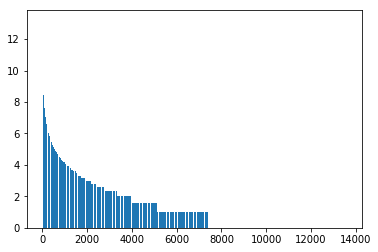

In [96]:
    len(freq_dict)
    print_zipf(freq_dict)